# Descenso del gradiente y Gradiente Conjugado.

**Objetivo.** Describir e implementar los métodos de descenso del gradiente y de gradiente conjugado para la solución de sistemas de ecuaciones lineales.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_02">MACTI-Algebra_Lineal_02</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019 y PE101922.**

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import macti.vis as mvis
import macti.math as mmat
from macti.eval import *
quiz = Quiz('al02_03', 'notebooks', 'local')

La siguiente función será usada para graficar algunos resultados.

In [2]:
def grafica(x, y1, y2, sol = [], xs = [], ys = [], vA = [], xg = [], yg = [], z = []):
    """
    Esta función grafica las líneas rectas, la solución, los pasos y los eigenvectores.
    """
    v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
    v.set_coordsys(1)
    
    # Graficamos las líneas rectas
    v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
    v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2

    if len(sol):
        # Graficamos la solución
        v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, alpha=0.75, zorder=5, label='Solución final         .') # Solución

    if len(xs) and len(ys):
        # Graficamos los pasos
        v.scatter(1, xs[0], ys[0], fc='yellow', ec='k', s = 75, alpha=0.75, zorder=8, label='Solución inicial')
        v.scatter(1, xs[1:], ys[1:], c='navy', s = 10, alpha=0.5, zorder=8)
        v.plot(1, xs, ys, c='grey', ls = '--', lw=1.0, zorder=8, label='Pasos del método')

    if len(vA):
        # Graficamos los eigenvectores
        v.quiver(1, [sol[0], sol[0]], [sol[1], sol[1]], vA[0], vA[1], scale=10, zorder=9)

    if len(xg) and len(yg) and len(z):
        v.contour(1, xg, yg, z, levels = 25, cmap='twilight', linewidths=1.0, zorder=1)        
        
    v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.90, 1.02))
    v.grid()
    v.show()

<div class="alert alert-success">

## Ejemplo 1. Cruce de líneas rectas.

Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x + 2y & = &2 \\
2x + 6y & = &-8
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir como:

$$
\begin{array}{ccc}
\dfrac{3}{2}x + y & = & 1 \\
\dfrac{2}{6}x + y & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y = m_1 x + b_1 \\
y = m_2 x + b_2
\end{array} \text{ donde }
\begin{array}{ccc}
m_1 = -\dfrac{3}{2} & b_1 = 1 \\
m_2 = -\dfrac{2}{6} & b_2 = -\dfrac{8}{6}
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir en forma de un sistema lineal:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

</div>

Podemos calcular el cruce de las rectas resolviendo el sistema lineal:

Matriz A : 
[[3 2]
 [2 6]]
Vector b : 
[ 2 -8]
Solución del sistema: 
[ 2. -2.]


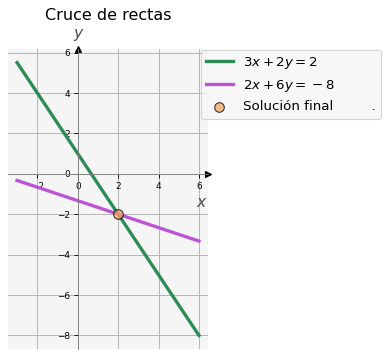

In [3]:
# Dominio
x = np.linspace(-3,6,10)

# Línea recta 1
m1 = -3/2
b1 = 1
y1 = m1 * x + b1

# Línea recta 2
m2 = -2/6
b2 = -8/6
y2 = m2 * x + b2 

# Definimos el sistema de ecuaciones lineales
A = np.array([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n{}".format(A))
print("Vector b : \n{}".format(b))

# Resolvemos el sistema
sol = np.linalg.solve(A,b)
print("Solución del sistema: \n{}".format(sol))

# Usamos la función grafica() para mostrar las rectas y la solución
grafica(x, y1, y2, sol)

En general, un sistema de ecuaciones de $n \times n$ se escribe como sigue:

$$
\begin{array}{ccccccc}
a_{11}x_1 & + & a_{12}x_2 & +  \dots  + & a_{1n}x_n & = & b_1 \\
a_{21}x_1 & + & a_{22}x_2 & +  \dots + & a_{2n}x_n & = & b_2 \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{i1}x_1 & + & a_{i2}x_2 & +  \dots + & a_{in}x_n & = & b_i \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{n1}x_1 & + & a_{n2}x_2 & + \dots + & a_{nn}x_n & = & b_n
\end{array}
$$

Es posible usar métodos más eficientes que el de Jacobi, Gauss-Seidel y SOR para resolver este tipo de sistemas. 
A continuación veremos los métodos del descenso del gradiente y método de gradiente conjugado.

# Métodos del subespacio de Krylov
Una excelente referencia para comenzar con estos métodos es la siguiente:

Shewchuk, J. R. (1994). [An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf). Carnegie-Mellon University. Department of Computer Science.

## Cálculo de eigenvectores
Los eigenvalores y eigenvectores de una matriz son herramientas muy útiles para entender ciertos comportamientos. Una descripción la puedes ver en la notebook [05_Matrices_Normas_Eigen.ipynb](05_Matrices_Normas_Eigen.ipynb). Los eigenvalores y eigenvectores se pueden calcular como sigue:

In [4]:
# Usando la función np.linalg.eig()
np.linalg.eig(A)  # w: eigenvalues, v: eigenvectors

EigResult(eigenvalues=array([2., 7.]), eigenvectors=array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))

La función `eigen_land()` de la biblioteca `macti` utiliza la función `np.linalg.eig()` para ofrecer una salida más entendible:

In [5]:
# Usando la función eigen_land() de macti
wA, vA = mmat.eigen_land(A)

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


Los eigenvectores se pueden visualizar, cuando la matriz es de $2\times2$:

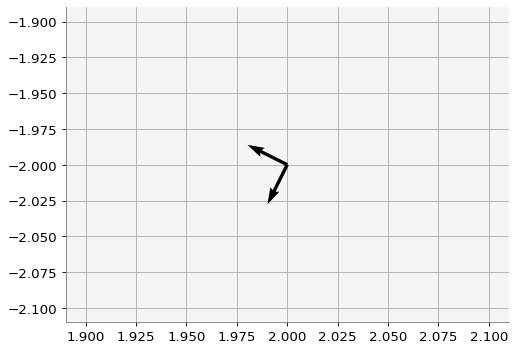

In [6]:
# Graficamos los eigenvectores
xv = np.array([[sol[0], sol[0]],
               [sol[1], sol[1]]])

v = mvis.Plotter() 
v.quiver(1, xv[0], xv[1], vA[0], vA[1], scale=10, zorder=6)
v.grid()
v.show()

Ahora usamos la función `grafica()` definida al principio de esta notebook para ver los eigenvectores y las líneas rectas:

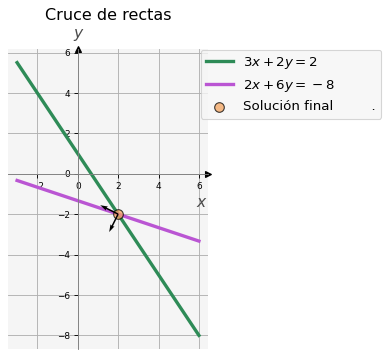

In [7]:
# Usamos la función grafica() para ver los eigenvectores
grafica(x,y1,y2,sol,vA=vA)

## Forma cuadrática
La forma cuadrática de un sistema de ecuaciones lineales, permite transformar el problema $A \mathbf{x} = \mathbf{b}$ en un probema de minimización.

$$ f(\mathbf{x}) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + \mathbf{c} $$

$$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
\mathbf{x} =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
\mathbf{b} =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
\mathbf{c} =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$$

$$ f^\prime(\mathbf{x}) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $$

- Cuando $A$ es simétrica: $ f^\prime(\mathbf{x}) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(\mathbf{x})$ se obtiene cuando $ f^\prime(\mathbf{x}) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$

Calculemos la forma cuadrática para nuestro ejemplo:

In [8]:
# Tamaño de la malla para graficar
size_grid = 30
xp = np.linspace(-3,6,size_grid)
yp = np.linspace(-8,6,size_grid)

xg, yg = np.meshgrid(xp, yp)

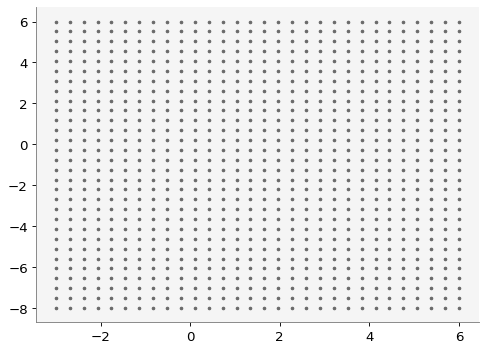

In [9]:
# Graficamos los puntos de la malla
vis = mvis.Plotter()
vis.scatter(1, xg, yg, s = 5, c = 'dimgray')
vis.show()

$$ f(\mathbf{x}) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + \mathbf{c} $$

In [10]:
# Función cuadrática
f = lambda A,b,c,x: 0.5 * x @ A @ x.T - x @ b.T + c

In [11]:
# Arreglo para almacenar los valores de la función cuadrática
z = np.zeros((size_grid, size_grid))

# Cálculo de la función cuadrática
for i in range(size_grid):
    for j in range(size_grid):
        xc = np.array([xg[i,j], yg[i,j]])
        z[i,j] = f(A,b,0,xc)

Graficamos la forma cuadrática, almacenada en `z`, y la solución. Esta última debe estar en el mínimo de $f(\mathbf{x})$.

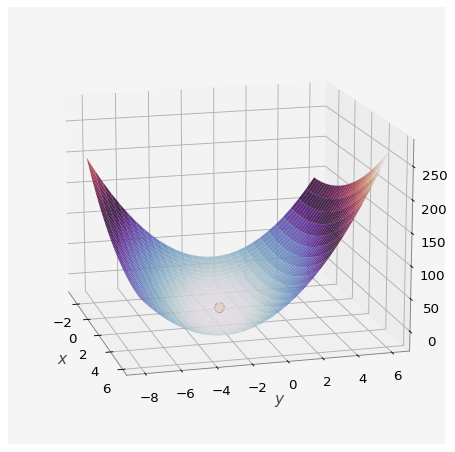

In [12]:
axis_par = [dict(projection='3d', aspect='auto', xlabel = '$x$', ylabel = '$y$', zlabel = '$f$')]
v = mvis.Plotter(1,1, axis_par, dict(figsize=(8,6)))
v.plot_surface(1, xg, yg, z, cmap='twilight', alpha=0.90) # f(x)
v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, zorder=5, label='Solución')
v.axes(1).view_init(elev = 15, azim = -15)

Observamos un paraboloide cuyo mínimo es la solución del sistema. Esto es más claro si graficamos los contornos de $f(\mathbf{x})$:

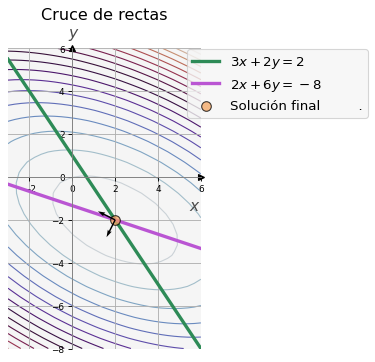

In [13]:
grafica(x, y1, y2, sol, vA = vA, xg = xg, yg = yg, z = z)

<div class="alert alert-success">


El gradiente de $f$ es $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $

</div>

Matrix([[3, 2], [2, 6]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>
Matrix([[2], [-8]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>
Matrix([[x], [y]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>


Matrix([
[3*x + 2*y - 2],
[2*x + 6*y + 8]])

Matrix([[3*x + 2*y - 2], [2*x + 6*y + 8]])
<class 'sympy.matrices.dense.MutableDenseMatrix'>


Matrix([[3.0*x + 2.0*y - 2, 2.0*x + 6.0*y + 8]])

Matrix([[3.0*x + 2.0*y - 2, 2.0*x + 6.0*y + 8]])
<class 'sympy.matrices.dense.MutableDenseMatrix'>


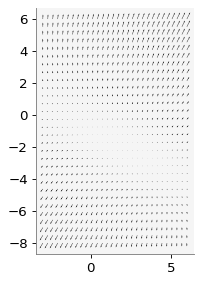

In [15]:
x, y = sympy.symbols('x y')
X = sympy.Matrix([x, y])
As = sympy.Matrix([[3, 2], [2, 6]])
bs = sympy.Matrix([2, -8])
print(As, type(As))
print(bs, type(bs))
print(X, type(X))

fp = As @ X - bs
display(fp)
print(fp) 
print(type(fp))

ff = 0.5 * X.T @ A @ X - X.T @ b
ff
Df = sympy.Matrix(ff).jacobian(X)
display(Df)
print(Df)
print(type(Df))

f1 = sympy.lambdify(X, Df[0])
f2 = sympy.lambdify([x, y], Df[1])

U=[f1(x1, y1) for x1,y1 in zip(xg,yg)]
V=[f2(x1,y1) for x1,y1 in zip(xg,yg)]

fig = plt.figure(figsize=(6,4))
plt.quiver(xg,yg,U,V)
plt.gca().set_aspect('equal')
plt.show()

## Algoritmo de descenso por el gradiente.
Este algoritmo utiliza la dirección del gradiente, en sentido negativo, para encontrar el mínimo y la solución del sistema:

$
\begin{array}{l}
\text{Input} : \mathbf{x}_0, tol \\
\mathbf{r}_0 = \mathbf{b}-A\mathbf{x}_0 \\
k = 0 \\
\text{WHILE}(\mathbf{r}_k > tol) \\
\qquad \mathbf{r}_k \leftarrow \mathbf{b}-A\mathbf{x}_k \\
\qquad \alpha_k \leftarrow \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{r}_k^T A \mathbf{r}_k} \\
\qquad \mathbf{x}_{k+1} \leftarrow \mathbf{x}_k + \alpha_k \mathbf{r}_k \\
\qquad k \leftarrow k + 1 \\
\text{ENDWHILE}
\end{array}
$

## Implementación.

In [ ]:
def steepest(A,b,tol,kmax,xi,yi):
    # Solución inicial en forma de vector
    x = np.array([xi, yi]) 
    
    # Arreglos para almacenar los pasos.
    xs, ys = [xi], [yi]
    
    # Solución exacta
    xe = np.array([2, -2]) 

    # Cálculo del residuo inicial
    r = b.T - A @ x
    res = np.linalg.norm(r, 2)

    # Lista de residuos y error
    # Se almacenan el residuo y error iniciales
    res_list = [res]
    error_list = [np.linalg.norm(xi - xe, 2)]
    
    k = 0
    print('{:^2} {:^10} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'Residuo', 'x0', 'x1'))
    while res > tol and k < kmax:
        alpha = r.T @ r / (r.T @ A @ r)
        x = x + r * alpha
        xs.append(x[0])
        ys.append(x[1])
        r = b.T - A @ x
        
        # Residuo
        res = np.linalg.norm(r, 2)
        res_list.append(res)
        
        # Error
        error = np.linalg.norm(x - xe, 2)
        error_list.append(error)
        
        k += 1
        print('{:2d} {:10.9f} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, res, x[0], x[1]))
    return x, xs, ys, error_list, res_list, k 

<div class="alert alert-success">

## Ejercicio 1.

Haciendo uso de la función `steepest()` definida en la celda anterior, aproxima la solución del sistema de ecuaciones del Ejemplo 1. Utiliza la solución inicial `(xi, yi) =` $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones. 
Utiliza las variables `solGrad`, `xs`, `ys`, `eGrad`, `rGrad` e `itGrad` para almacenar la salida de la función `steepest()`.
Posteriormente grafica las rectas y cómo se va calculando la solución con este método. Utiliza la función `grafica()`. Grafica también el error y el residuo. 
</div>

In [ ]:
# Solución inicial (debe darse como un arreglo tipo columna)
# (xi, yi) = ...

# Método Steepest descend
# ...

### BEGIN SOLUTION
# Solución inicial
(xi, yi) = (-2., 2.)
tol = 1e-5
kmax = 50

# Método Steepest descend
solGrad, xs, ys, eGrad, rGrad, itGrad  = steepest(A, b, tol, kmax, xi, yi)

file_answer = FileAnswer()
file_answer.write('1', solGrad, 'solGrad es incorrecta: revisa la llamada y ejecución de la función steepest() así como sus parámetros de entrada.')
file_answer.write('2', eGrad[-1], 'eGrad[-1] es incorrecto: revisa la llamada y ejecución de la función steepest() así como sus parámetros de entrada.')
file_answer.write('3', rGrad[-1], 'rGrad[-1] es incorrecto: revisa la llamada y ejecución de la función steepest() así como sus parámetros de entrada.')
file_answer.write('4', itGrad, 'itGrad es incorrecto: revisa la llamada y ejecución de la función steepest() así como sus parámetros de entrada.')
file_answer.to_file('al02_03')
### END SOLUTION

In [ ]:
quiz.eval_numeric('1', solGrad)
quiz.eval_numeric('2', eGrad[-1])
quiz.eval_numeric('3', rGrad[-1])
quiz.eval_numeric('4', itGrad)

Gráfica de las rectas, la solución y los pasos realizados.

In [ ]:
grafica(x, y1, y2, sol, xs, ys, xg = xg, yg = yg, z = z)

Grafica del error y el residuo.

In [ ]:
# Lista con el número de las iteraciones
l_itGrad = list(range(0,itGrad+1)) 

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(2,1,axis_par = [a_p, a_p], fig_par=dict(figsize=(8,5))) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itGrad, eGrad, marker='.', c='C0')
v.axes(2).set_title('Residuo', loc='left')
v.plot(2, l_itGrad, rGrad, marker='.', c='C1')
v.grid()

## Algoritmo de Gradiente Conjugado
Este algorimo mejora al descenso del gradiente tomando direcciones conjugadas para evitar repetir un paso en una misma dirección.

$
\begin{array}{l}
\text{Input} : A, \mathbf{b}, \mathbf{x}_0, k_{max}, tol \\
\mathbf{d_0} = \mathbf{r}_0 = \mathbf{b} - A \mathbf{x}_0 \\ 
k = 0 \\
\text{While} (||\mathbf{r}|| > tol \quad \text{AND} \quad k < k_{max} ) \\
\qquad \alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} \\
\qquad \mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{d}_{k} \\
\qquad \mathbf{r}_{k+1} = \mathbf{r}_{k} - \alpha_k A \mathbf{d}_{k} \\
\qquad \beta_{k+1} = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_{k}^T \mathbf{r}_{k}}  \\
\qquad \mathbf{d}_{k+1} = \mathbf{r}_{k+1} + \beta_{k+1} \mathbf{d}_{k} \\
\qquad k = k + 1  \\
\text{End While}
\end{array}
$

### Implementación.

In [ ]:
def conjugateGradient(A,b,tol,kmax,xi,yi):
    # Solución inicial en forma de vector
    x = np.array([xi, yi]) 
    
    # Arreglos para almacenar los pasos.
    xs, ys = [xi], [yi]
    
    # Solución exacta
    xe = np.array([2, -2]) 

    # Cálculo del residuo inicial
    r = b.T - A @ x
    d = r
    rk_norm = r.T @ r
    res = np.linalg.norm(rk_norm)

    # Lista de residuos y error
    # Se almacenan el residuo y error iniciales
    res_list = [res]
    error_list = [np.linalg.norm(xi - xe, 2)]
    
    k = 0
    print('{:^2} {:^10} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'Residuo', 'x0', 'x1'))

    while(res > tol and k < kmax):
        alpha = float(rk_norm) / float(d.T @ A @ d)
        x = x + alpha * d
        xs.append(x[0])
        ys.append(x[1])
        r = r - alpha * A @ d
        
        # Residuo
        res = np.linalg.norm(r, 2)
        res_list.append(res)

        # Error
        error = np.linalg.norm(x - xe, 2)
        error_list.append(error)
        
        rk_old = rk_norm
        rk_norm = r.T @ r
        beta = float(rk_norm) / float(rk_old)
        d = r + beta * d
        
        k += 1
        print('{:2d} {:10.9f} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, res, x[0], x[1]))
    return x, xs, ys, error_list, res_list, k 


<div class="alert alert-success">

## Ejercicio 2.

Haciendo uso de la función `conjugateGradient()` definida en la celda anterior, aproxima la solución del sistema de ecuaciones del Ejemplo 1. Utiliza la solución inicial `(xi, yi) =` $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones. Utiliza las variables `solCGM`, `xs`, `ys`, `eCGM`, `rCGM` e `itCGM` para almacenar la salida de la función `conjugateGradient()`.
Posteriormente grafica las rectas y cómo se va calculando la solución con este método. Utiliza la función `grafica()`. Grafica también el error y el residuo. 
</div>

In [ ]:
# Solución inicial (debe darse como un arreglo tipo columna)
# (xi, yi) = ...

# Método CGM
# ...

### BEGIN SOLUTION
# Solución inicial
(xi, yi) = (-2., 2.)
tol = 1e-5
kmax = 50

# Método CGM
solCGM, xs, ys, eCGM, rCGM, itCGM = conjugateGradient(A, b, tol, kmax, xi, yi)

file_answer.write('5', solCGM, 'solCGM es incorrecta: revisa la llamada y ejecución de la función conjugateGradient() así como sus parámetros de entrada.')
file_answer.write('6', eCGM[-1], 'eCGM[-1] es incorrecto: revisa la llamada y ejecución de la función conjugateGradient() así como sus parámetros de entrada.')
file_answer.write('7', rCGM[-1], 'rCGM[-1] es incorrecto: revisa la llamada y ejecución de la función conjugateGradient() así como sus parámetros de entrada.')
file_answer.write('8', itCGM, 'itCGM es incorrecto: revisa la llamada y ejecución de la función conjugateGradient() así como sus parámetros de entrada.')
file_answer.to_file('al02_03')
### END SOLUTION

In [ ]:
quiz.eval_numeric('5', solCGM)
quiz.eval_numeric('6', eCGM[-1])
quiz.eval_numeric('7', rCGM[-1])
quiz.eval_numeric('8', itCGM)

In [ ]:
grafica(x, y1, y2, sol, xs, ys, xg = xg, yg = yg, z = z)

In [ ]:
# Lista con el número de las iteraciones
l_itGrad = list(range(0,itGrad+1)) 
l_itCGM = list(range(0,itCGM+1))

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(2,1,axis_par = [a_p, a_p], fig_par=dict(figsize=(8,5))) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itGrad, eGrad, marker='.', label='Error Steepest')
v.plot(1, l_itCGM, eCGM, marker='.', label='Error CGM')

v.axes(2).set_title('Residuo', loc='left')
v.plot(2, l_itGrad, rGrad, marker='.', label='Residuo Steepest')
v.plot(2, l_itCGM, rCGM, marker='.', label='Residuo CGM')

v.legend()
v.grid()

<div class="alert alert-success">

## Ejercicio 3.

Carga los archivos `errorJacobi.npy`, `errorGaussSeidel.npy` y `errorSOR.npy` en las variables `eJ`, `eG` y `eSOR` respectivamente (utiliza la función `np.load()`). Posteriormente grafica los errores de los 5 métodos: Jacobi, Gauss-Seidel, SOR, Steepest Descend, CGM. ¿Cuál de todos estos métodos usarías?
</div>

In [ ]:
eJ = np.load('errorJacobi.npy')
eG = np.load('errorGaussSeidel.npy')
eSOR = np.load('errorSOR.npy')

# Lista con el número de las iteraciones
l_itJ = list(range(0,len(eJ))) 
l_itG = list(range(0,len(eG))) 
l_itSOR = list(range(0,len(eSOR))) 
l_itGrad = list(range(0,itGrad+1)) 
l_itCGM = list(range(0,itCGM+1))

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itGrad)

# Gráfica del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itJ, eJ, marker='.', label='Jacobi')
v.plot(1, l_itG, eG, marker='.', label='Gauss-Seidel')
v.plot(1, l_itSOR, eSOR, marker='.', label='SOR')
v.plot(1, l_itGrad, eGrad, marker='.', label='Steepest descend')
v.plot(1, l_itCGM, eCGM, marker='.', label='Gradiente Conjugado')

v.legend()
v.grid()